# Purpose
The purpose of this notebook is to get familiar with the OpenAI API

# Step 0: Dependencies

Let's import our necessary libraries, and load in our API key

In [2]:
# Uncomment for first run, then re comment
# May take a while to run
! pip install openai langchain requests streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/9d/9f/09fe6469e891031596872bd50bff90d47bea5c32d426235714cf24662740/streamlit-1.28.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/17/16/b12fca347ff9d062e3c44ad9641d2ec50364570a059f3078ada3a5119d7a/altair-5.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/fa/2a/7f3714cbc6356a0efec525ce7a0613d581072ed6eb53eb7b9754f33db807/blinker-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for click<9,>=7.0 from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for pandas<3,>=1.3.0 from https://files.pythonhosted.org/packages/3d/c6/9bb3a1


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
#Imports
import openai
from openai import OpenAI
import base64
import requests
import os
from IPython.display import display, HTML
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage
from langchain.llms import OpenAI

In [18]:
#Load in API Key
api_key = os.environ.get('OPENAI_API_KEY')

In [19]:
#Initialize langchain chat client
chat = ChatOpenAI(temperature=0.7, openai_api_key=api_key)

In [20]:
#Initialize openai client
client = OpenAI(openai_api_key=api_key)

# Step 1: Basic Request
Let's start by making a basic request to the API

In [21]:
prompt = 'What rhymes with orange?'

response = chat([HumanMessage(content=prompt)])
print(response.content)

There are not many perfect rhymes for the word "orange." However, some near rhymes include "door hinge," "sporange" (a rare type of fungus), and "blorenge" (a hill in Wales).


# Step 2: Conversation

We can add our own human messages, as well as AI messages to a conversation. The model will proceed given its context

In [22]:
response = chat(
    [
        HumanMessage(content="I like the beaches where should I go?"),
        AIMessage(content="You should go to Nice, France"),
        HumanMessage(content="What else should I do when I'm there?")
    ]
)

print(response.content)

When you're in Nice, France, there are plenty of things to do besides enjoying the beaches. Here are some suggestions:

1. Explore the Old Town (Vieux Nice): Wander through the narrow streets, visit the local shops, and admire the colorful buildings. Don't miss the famous Cours Saleya market, where you can find fresh produce, flowers, and local products.

2. Promenade des Anglais: Take a stroll along this iconic promenade that stretches along the coastline. Enjoy the beautiful views, rent a bike or rollerblades, and soak up the vibrant atmosphere.

3. Visit the Musée Matisse: This museum is dedicated to the works of renowned artist Henri Matisse. Admire his paintings, sculptures, and drawings in a beautiful setting.

4. Colline du Château: Hike up to this hilltop park for panoramic views of Nice and its coastline. You can also visit the ruins of the former Castle of Nice and relax in the park's green spaces.

5. Enjoy the local cuisine: Nice is known for its delicious food. Try some tr

# Step 3: System message
We can tell the model a certain way to act. We will retry the previous prompt from above, but with a system message

In [23]:
response = chat(
    [
        SystemMessage(content="You are a nice AI bot that helps a user figure out where to travel in one short sentence"),
        HumanMessage(content="I like the beaches where should I go?"),
        AIMessage(content="You should go to Nice, France"),
        HumanMessage(content="What else should I do when I'm there?")
    ]
)

print(response.content)

Besides enjoying the beaches, you should explore the charming Old Town and indulge in delicious French cuisine.


# Step 4: Template
We can make a template of a prompt to feed to our model. There are ways to use templates built into langchain, but this is easier.

In [24]:
location = 'Europe'
food = 'Hamburgers'

prompt = f"I want to go to {location}. While I'm there, where can I eat {food}?"

response = chat([HumanMessage(content=prompt)])
print(response.content)

While Europe is known for its diverse culinary scene, you can definitely find places to enjoy hamburgers during your visit. Here are some popular options:

1. McDonald's: As a global fast-food chain, McDonald's has numerous locations across Europe, making it an easily accessible option for hamburgers.

2. Burger King: Another international fast-food chain, Burger King also has a significant presence in Europe, offering a variety of burger options.

3. Hard Rock Cafe: This American-themed restaurant chain is found in several European cities and serves classic American-style burgers.

4. Local burger joints: Many European cities have local burger spots that offer unique and delicious creations. These establishments often focus on quality ingredients and inventive flavor combinations.

5. American-style restaurants: Europe has a growing number of American-style diners and restaurants that specialize in burgers. Look for places with names like "The Burger Joint," "The Burger House," or "Th

# Step 5: Vision

We can use gpt4 to view and understand images

### **THIS IS VERY EXPENSIVE ($0.04 per run). DO NOT RUN OFTEN**

In [25]:

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "boardwalk.jpg"

# Getting the base64 string
base64_image = encode_image(image_path)

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4-vision-preview",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What’s in this image?"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

print(response.json())


{'id': 'chatcmpl-8OvLtSEuTy32k2QdrSmM9LfsmmkTy', 'object': 'chat.completion', 'created': 1700951025, 'model': 'gpt-4-1106-vision-preview', 'usage': {'prompt_tokens': 1118, 'completion_tokens': 138, 'total_tokens': 1256}, 'choices': [{'message': {'role': 'assistant', 'content': 'This image features a seaside amusement park located on a pier. Prominent attractions include a Ferris wheel and a roller coaster named "Crazy Mouse." There are also other rides and attractions typically found at such parks, like a carousel (visible by the red-and-white tent with the flags). The ocean is visible to the left of the pier, and the sky is clear, indicating nice weather. There\'s no visible presence of people from this distance, but they are likely present given that the park appears to be open and operational. The pier itself is supported by a series of concrete pillars underneath, which extend into the water. The amusement park creates a colorful and festive atmosphere along the waterfront.'}, 'fin

Display the image


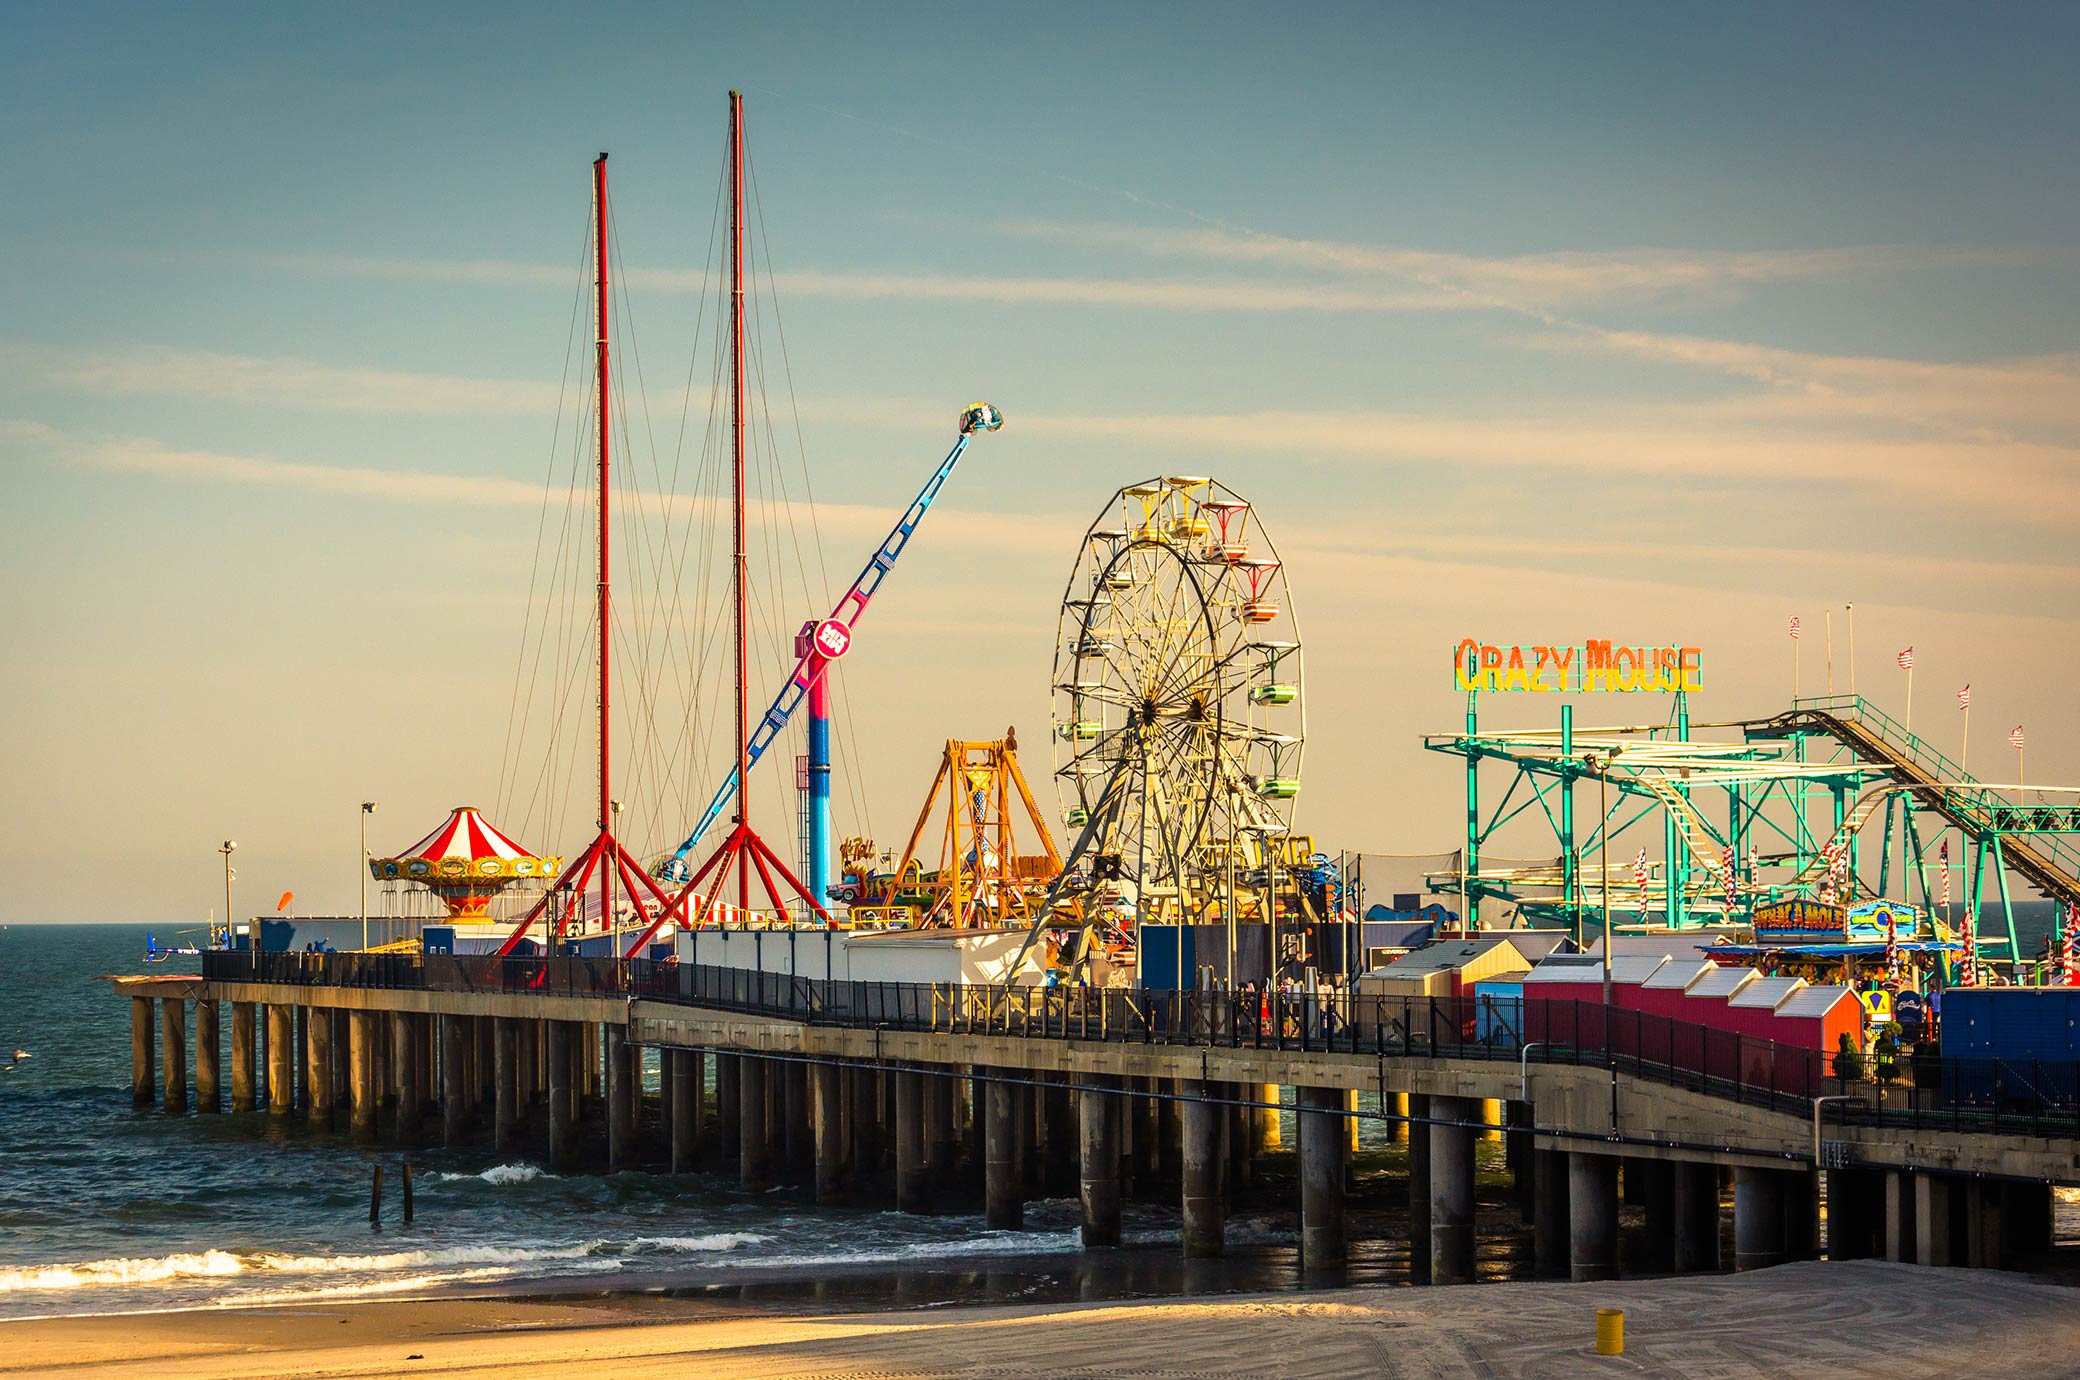

This image features a seaside amusement park located on a pier. Prominent attractions include a Ferris wheel and a roller coaster named "Crazy Mouse." There are also other rides and attractions typically found at such parks, like a carousel (visible by the red-and-white tent with the flags). The ocean is visible to the left of the pier, and the sky is clear, indicating nice weather. There's no visible presence of people from this distance, but they are likely present given that the park appears to be open and operational. The pier itself is supported by a series of concrete pillars underneath, which extend into the water. The amusement park creates a colorful and festive atmosphere along the waterfront.


In [26]:
# Create an HTML image tag with the base64 data
html_img = f'<img src="data:image/png;base64,{base64_image}" alt="Base64 Image">'

# Display the image
display(HTML(html_img))

print(response.json()['choices'][0]['message']['content'])

# Step 6: DALLE
Let's try to generate an image using dalle

### **THIS IS VERY EXPENSIVE. DO NOT RUN OFTEN**

In [27]:
from openai import OpenAI
client = OpenAI(api_key=api_key)

prompt = 'A dog wearing a silly hat'

response = client.images.generate(
  model="dall-e-3",
  prompt=prompt,
  size="1024x1024",
  quality="standard",
  n=1,
  response_format='b64_json'
)

image_url = response.data[0].url



In [28]:
b64 = response.data[0].b64_json


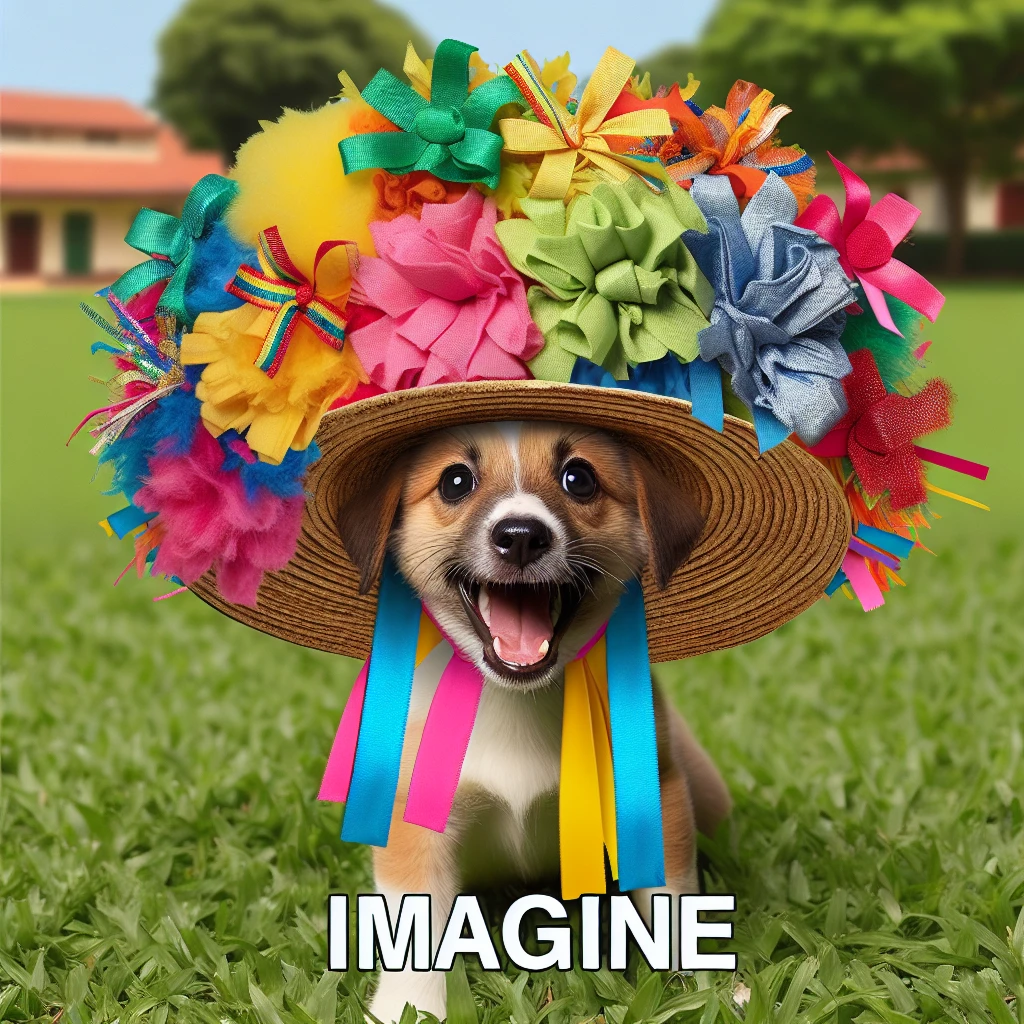

In [29]:
# Create an HTML image tag with the base64 data
html_img = f'<img src="data:image/png;base64,{b64}" alt="Base64 Image">'

# Display the image
display(HTML(html_img))